## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [1]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

In [7]:
from scipy.spatial.distance import euclidean
distances = np.sum((clust - centroid)**2,axis = 1)
sum_distance = np.sum(distances)
print(f'Сумма внутрикластерных расстояний: {sum_distance:.4f}')

Сумма внутрикластерных расстояний: 16.3121


### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

In [8]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

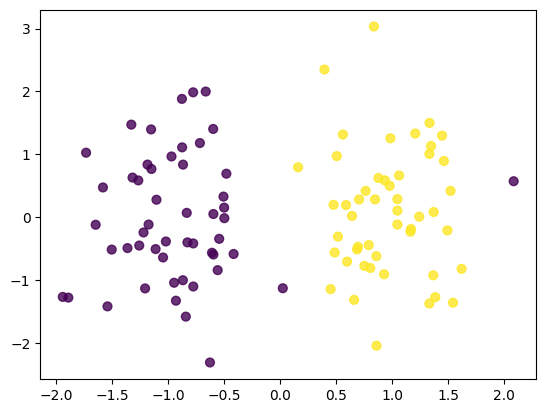

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],s=40,c=Y,marker='o',alpha=0.8, label='data')
plt.show()

In [10]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3,random_state=42)
kmeans_model.fit(X)

/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

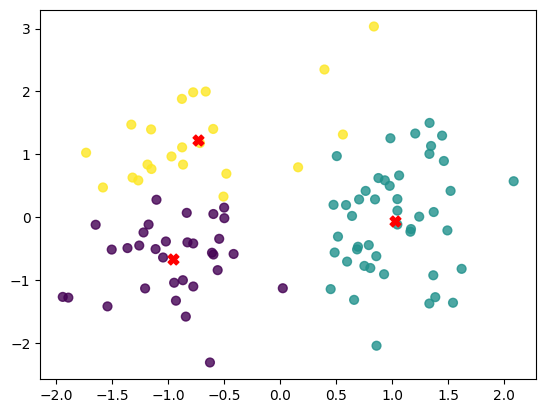

In [16]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', cmap='viridis',alpha=0.8, label='data')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],
            c='red', marker='X', s=60, label='Centroids')
plt.show()

In [13]:
kmeans_model.cluster_centers_[:, 0]

array([-0.96244188,  1.02062428, -0.73298886])

### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

In [17]:
centers = []
for _ in range(10):
    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
    kmeans_model.fit(X)
    centers.append(kmeans_model.cluster_centers_)

/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.w

In [21]:
centers,centers.shape

(array([[ 0.95917947,  0.07757361],
        [-0.99782309, -0.01028211],
        [-0.61799519,  0.75049632],
        [ 0.42987499, -0.46301557],
        [ 0.97792098,  0.10168404],
        [-0.97742455, -0.03263543],
        [-0.97742455, -0.03263543],
        [ 0.97792098,  0.10168404],
        [-0.9742468 ,  0.26404448],
        [ 0.79756232, -0.15326492],
        [-0.99888979, -0.19359111],
        [ 0.85136578,  0.22884485],
        [-0.85960707, -0.12385456],
        [ 1.00964355,  0.22044733],
        [-0.94435817, -0.30353237],
        [ 0.80491291,  0.32249851],
        [-0.09505471,  1.07326982],
        [ 0.05621978, -0.57553258],
        [-0.99782309, -0.01028211],
        [ 0.95917947,  0.07757361]]),
 (20, 2))

In [20]:
centers = np.array(centers).reshape(-1, 2)
centers

array([[ 0.95917947,  0.07757361],
       [-0.99782309, -0.01028211],
       [-0.61799519,  0.75049632],
       [ 0.42987499, -0.46301557],
       [ 0.97792098,  0.10168404],
       [-0.97742455, -0.03263543],
       [-0.97742455, -0.03263543],
       [ 0.97792098,  0.10168404],
       [-0.9742468 ,  0.26404448],
       [ 0.79756232, -0.15326492],
       [-0.99888979, -0.19359111],
       [ 0.85136578,  0.22884485],
       [-0.85960707, -0.12385456],
       [ 1.00964355,  0.22044733],
       [-0.94435817, -0.30353237],
       [ 0.80491291,  0.32249851],
       [-0.09505471,  1.07326982],
       [ 0.05621978, -0.57553258],
       [-0.99782309, -0.01028211],
       [ 0.95917947,  0.07757361]])

In [22]:
centers[:,0]

array([ 0.95917947, -0.99782309, -0.61799519,  0.42987499,  0.97792098,
       -0.97742455, -0.97742455,  0.97792098, -0.9742468 ,  0.79756232,
       -0.99888979,  0.85136578, -0.85960707,  1.00964355, -0.94435817,
        0.80491291, -0.09505471,  0.05621978, -0.99782309,  0.95917947])

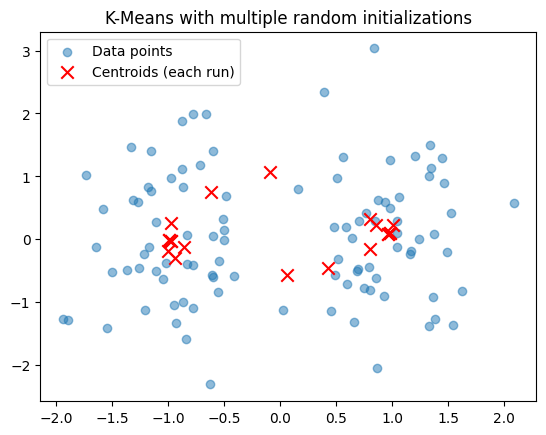

In [24]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data points')
plt.scatter(centers[:,0],centers[:,1],c='red', marker='x', s=80, label='Centroids (each run)')
plt.title('K-Means with multiple random initializations')
plt.legend()
plt.show()

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.